In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# Initialize the MountainCar-v0 environment with the new step API and render_mode='human'
env = gym.make('MountainCar-v0', render_mode='human', new_step_api=True)

In [3]:
# Define the Q-learning parameters
n_actions = env.action_space.n
n_states = (10, 10)  # Coarser discretization of the state space

In [4]:
# Q-table initialization
Q = defaultdict(lambda: np.zeros(n_actions))

In [5]:
# Parameters
alpha = 0.2        # Learning rate (increased)
gamma = 0.99       # Discount factor
epsilon = 1.0      # Exploration rate
epsilon_decay = 0.98  # Faster decay
epsilon_min = 0.01
n_episodes = 100   # Reduce the number of episodes for faster testing
max_steps = 200    # Maximum number of steps per episode

In [6]:
def discretize_state(state):
    """Discretize the continuous state space."""
    state = (state - env.observation_space.low) / (env.observation_space.high - env.observation_space.low)
    state = (state * np.array(n_states)).astype(int)
    return tuple(state)

In [7]:
def q_learning():
    """Q-Learning algorithm."""
    global epsilon  # Declare epsilon as global to modify its value
    rewards = []

    for episode in range(n_episodes):
        state = discretize_state(env.reset())
        total_reward = 0

        for _ in range(max_steps):
            # Choose action with epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state = discretize_state(next_state)

            # Q-learning update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state][best_next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state
            total_reward += reward

            if done:
                break

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        rewards.append(total_reward)

    return rewards

In [8]:
def plot_rewards(rewards):
    """Plot the rewards over episodes."""
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Total Reward per Episode')
    plt.show()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


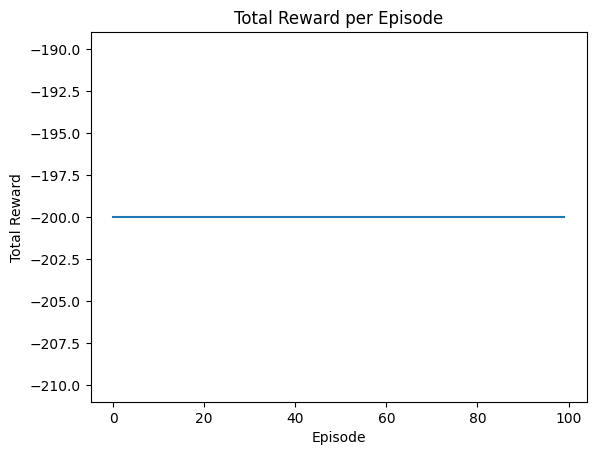

Total reward in test run: -200.0


In [9]:
if __name__ == "__main__":
    rewards = q_learning()
    plot_rewards(rewards)

    # Test the trained agent
    state = discretize_state(env.reset())
    total_reward = 0
    for _ in range(max_steps):
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        next_state = discretize_state(next_state)
        state = next_state
        total_reward += reward
        if done:
            break
    print(f"Total reward in test run: {total_reward}")
    env.close()